In [1]:
from dactim_mri.visualization import plot, plot_histo, plot3D

from dactim_mri.transformation import (
    skull_stripping,
    resample,
    registration,
    n4_bias_field_correction
)

from dactim_mri.data import Data

import os

c:\Users\467355\Documents\Envs\preprocEnv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


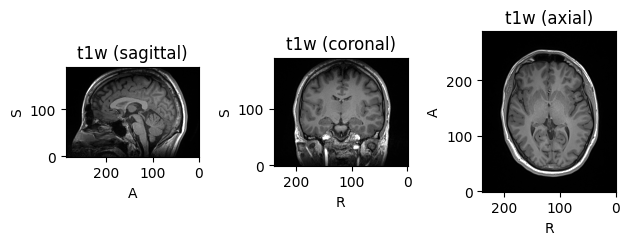

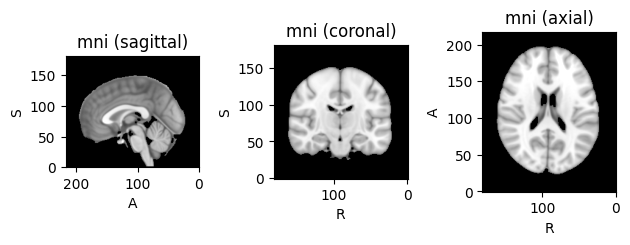

In [2]:
t1_path = "data/t1w.nii.gz"
mni_path = "data/mni.nii.gz"

plot(t1_path)
plot(mni_path)

In [3]:
t1 = Data(t1_path)
print(t1)

mni = Data(mni_path)
print(mni)

Dactim MRI - Data Object:
	Shape: (240, 288, 192)
	Voxel dimension: [0.8888889  0.8888889  0.90000004]
	Affine:
[[ 8.88878286e-01 -4.34391340e-03  0.00000000e+00 -1.05155334e+02]
 [ 4.34391340e-03  8.88878286e-01  0.00000000e+00 -1.30047836e+02]
 [ 0.00000000e+00  0.00000000e+00  9.00001526e-01 -6.65795441e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Dactim MRI - Data Object:
	Shape: (182, 218, 182)
	Voxel dimension: [1. 1. 1.]
	Affine:
[[  -1.   -0.    0.   90.]
 [  -0.    1.   -0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]


bse.exe -i "data/t1w.nii.gz" -o "data/t1w_brain.nii.gz" --mask "data/t1w_brain_mask.nii.gz" --auto


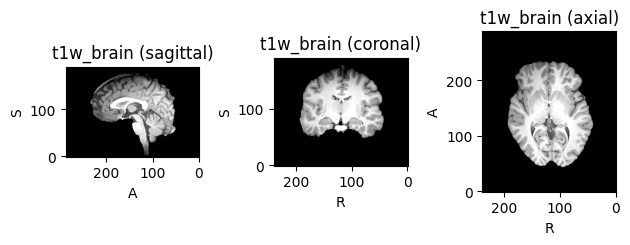

In [4]:
t1_brain_path, mask_brain_path = skull_stripping(t1_path, mask=True)

os.chdir(r"C:\Users\467355\Documents\dactim-mri\tests")
plot(t1_brain_path)

INFO - Starting resampling for
	data/mni.nii.gz
	data/t1w_brain.nii.gz


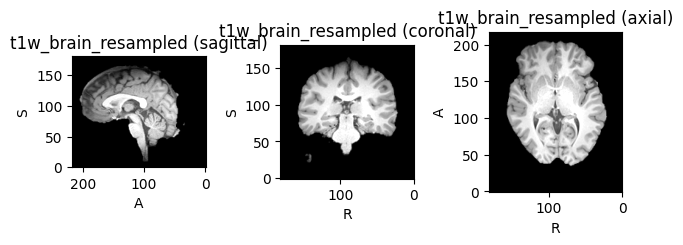

In [9]:
resample(mni_path, t1_brain_path)

t1_brain_resample_path = t1_brain_path.replace(".nii", "_resampled.nii")
plot(t1_brain_resample_path)

In [10]:
print(Data(t1_brain_resample_path))
print(mni)

Dactim MRI - Data Object:
	Shape: (182, 218, 182)
	Voxel dimension: [1. 1. 1.]
	Affine:
[[  -1.   -0.    0.   90.]
 [  -0.    1.   -0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Dactim MRI - Data Object:
	Shape: (182, 218, 182)
	Voxel dimension: [1. 1. 1.]
	Affine:
[[  -1.   -0.    0.   90.]
 [  -0.    1.   -0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]


INFO - Starting registration for
	data/t1w_brain_resampled.nii.gz
	data/mni.nii.gz
INFO - Saving generated image at
	data/t1w_brain_resampled_flirt.nii.gz


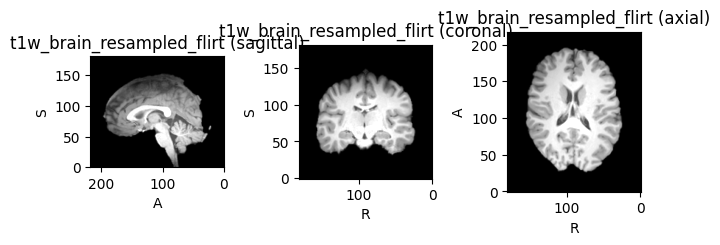

In [11]:
t1_brain_resample_flirt_path = registration(mni_path, t1_brain_resample_path, matrix=False, force=False)

plot(t1_brain_resample_flirt_path)

In [12]:
print(Data(t1_brain_resample_flirt_path))
print(mni)

Dactim MRI - Data Object:
	Shape: (182, 218, 182)
	Voxel dimension: [1. 1. 1.]
	Affine:
[[  -1.   -0.    0.   90.]
 [  -0.    1.   -0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Dactim MRI - Data Object:
	Shape: (182, 218, 182)
	Voxel dimension: [1. 1. 1.]
	Affine:
[[  -1.   -0.    0.   90.]
 [  -0.    1.   -0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]


In [13]:
t1_brain_resample_flirt_corrected_path, bias_field_path = n4_bias_field_correction(t1_brain_resample_flirt_path, mask=True, force=False)

plot(t1_brain_resample_flirt_corrected_path)
plot(bias_field_path)

INFO - Starting bias field correction for
	data/t1w_brain_resampled_flirt.nii.gz
INFO - Saving generated mask at
	data/t1w_brain_resampled_flirt_corrected_mask.nii.gz
INFO - Saving generated image at
	data/t1w_brain_resampled_flirt_corrected.nii.gz
INFO - Saving generated mask at
	data/t1w_brain_resampled_flirt_corrected_mask.nii.gz


TypeError: in method 'WriteTransform', argument 1 of type 'itk::simple::Transform const &'